In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from exports.e_02_MNISTLoader import loadMNIST

import matplotlib
from matplotlib import pyplot as plt
import torch

matplotlib.rcParams['image.cmap'] = 'cool'

In [3]:
x_train, y_train, x_valid, y_valid = loadMNIST()
bs = 64 # batch size

## Data API

In [4]:
#--export--#
class Dataset():
    def __init__(self, x, y): self.x, self.y = x, y
    def __len__(self): return len(self.x)
    def __getitem__(self, i): return self.x[i], self.y[i]

In [5]:
train_ds, valid_ds = Dataset(x_train, y_train), Dataset(x_valid, y_valid)
assert len(train_ds) == len(y_train)
assert len(valid_ds) == len(y_valid)

In [6]:
class BatchLoader():
    def __init__(self, dataset, batch_size): self.ds, self.bs = dataset, batch_size
    def __iter__(self):
        for i in range(0, len(self.ds), self.bs): yield self.ds[i:i+bs]

In [7]:
train_bl, valid_bl = BatchLoader(train_ds, 64), BatchLoader(valid_ds, 32)

Text(0.5, 1.0, '5')

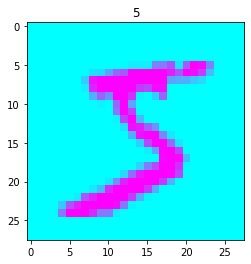

In [8]:
xb, yb = next(iter(train_bl))
plt.imshow(xb[0].view(28, 28))
plt.title(yb[0].item())

### Random Sampling

In [9]:
class Sampler():
    """ Returns ordered (or random) indexes from which to draw
        batched samples from a dataset. """
    
    def __init__(self, ds, bs, shuffle=False):
        self.N, self.bs, self.shuffle = len(ds), bs, shuffle
    
    def __iter__(self):
        self.idxs = torch.randperm(self.N) if self.shuffle else torch.arange(self.N)
        for i in range(0, self.N, self.bs): yield self.idxs[i:i+bs]

In [10]:
s = Sampler(train_ds, 64)
samp1 = train_ds[next(iter(s))][1]
s = Sampler(train_ds, 64)
samp2 = train_ds[next(iter(s))][1]

samp1[:10], samp2[:10]

(tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]),
 tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]))

In [11]:
s = Sampler(train_ds, 64, shuffle=True)
samp1 = train_ds[next(iter(s))][1]
s = Sampler(train_ds, 64, shuffle=True)
samp2 = train_ds[next(iter(s))][1]

samp1[:10], samp2[:10]

(tensor([9, 0, 3, 5, 0, 6, 3, 9, 9, 9]),
 tensor([0, 7, 8, 3, 5, 5, 0, 2, 9, 1]))

### Improved DataLoader

In [12]:
class DataLoader():
    def __init__(self, dataset, sampler): 
        self.ds, self.sampler = dataset, sampler
    
    def __iter__(self):
        for s in self.sampler: yield self.ds[s]

In [13]:
train_samp = Sampler(train_ds, bs, shuffle=True)
valid_samp = Sampler(valid_ds, bs, shuffle=False)

train_dl, valid_dl = DataLoader(train_ds, train_samp), DataLoader(valid_ds, valid_samp)

First entry from two identically sampled batches:


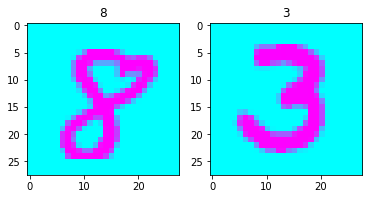

In [14]:
def plot_samples(dl):
    # sample
    xb,yb = next(iter(dl))
    plt.subplot(1,2,1)
    plt.imshow(xb[0].view(28,28))
    plt.title(yb[0].item())

    # sample again
    xb,yb = next(iter(dl))
    plt.subplot(1,2,2)
    plt.imshow(xb[0].view(28,28))
    plt.title(yb[0].item())
    
plot_samples(train_dl)
print('First entry from two identically sampled batches:')

First entry from two identically sampled batches:


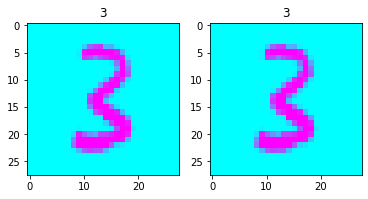

In [15]:
plot_samples(valid_dl)
print('First entry from two identically sampled batches:')

### Pytorch Implementation

In [16]:
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [17]:
def collate(batch):
    xb, yb = zip(*batch)
    return torch.stack(xb), torch.stack(yb)

train_dl = DataLoader(train_ds, bs, sampler=RandomSampler(train_ds), collate_fn=collate)
valid_dl = DataLoader(valid_ds, bs, sampler=SequentialSampler(valid_ds), collate_fn=collate)

First entry from two randomly sampled batches:


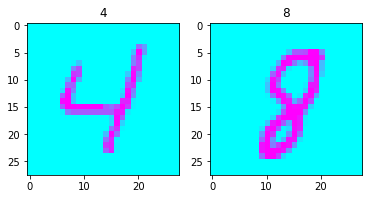

In [18]:
plot_samples(train_dl)
print('First entry from two randomly sampled batches:')

First entry from two identically sampled batches:


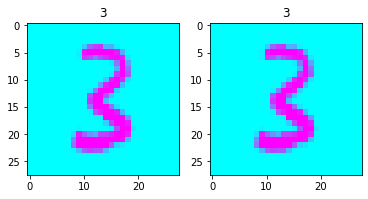

In [19]:
plot_samples(valid_dl)
print('First entry from two identically sampled batches:')

In [1]:
!python utils/export_notebook.py 04_DataAPI.ipynb

Notebook 04_DataAPI.ipynb has been converted to module ./exports/e_04_DataAPI.py!
